In [59]:
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install seaborn
#pip install nltk
#pip install  WordCloud

In [60]:
# import the required libraries nlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [61]:
# read the dataset
df=pd.read_csv('data.csv')
# print the first five feature
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb-21,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb-21,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr-21,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr-16,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [62]:
# Assuming 'Review Text' and 'Ratings' are the correct column names
new_dataset = df[['Review text', 'Ratings']]
# Check the first few rows of the new dataset
new_dataset.head()


,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [63]:

# Assuming your dataset is stored in a variable named 'new_dataset'
# Define a function to convert ratings to negative or positive
def convert_rating(rating):
    if rating <= 3:
        return 'negative'
    else:
        return 'positive'

# Apply the function to create a new column 'Sentiment'
new_dataset['Sentiment'] = new_dataset['Ratings'].apply(convert_rating)

new_dataset.head()

,Review text,Ratings,Sentiment
0,"Nice product, good quality, but price is now r...",4,positive
1,They didn't supplied Yonex Mavis 350. Outside ...,1,negative
2,Worst product. Damaged shuttlecocks packed in ...,1,negative
3,"Quite O. K. , but nowadays the quality of the...",3,negative
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative


In [64]:
new_dataset.shape

(8518, 3)

In [65]:
new_dataset['Sentiment'].value_counts()

Sentiment
positive    6826
negative    1692
Name: count, dtype: int64

In [66]:
new_dataset['Sentiment'].value_counts(normalize=True)

Sentiment
positive    0.801362
negative    0.198638
Name: proportion, dtype: float64

<Axes: xlabel='Sentiment', ylabel='count'>

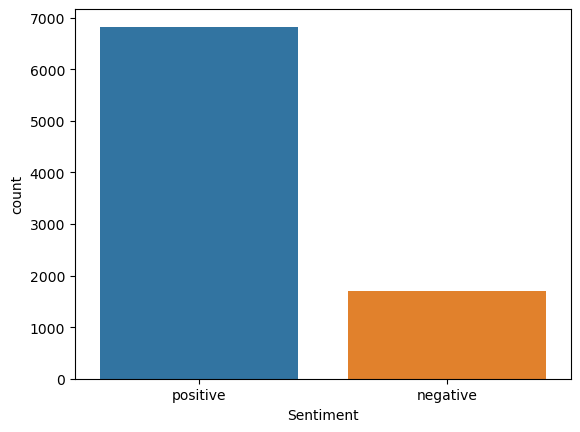

In [67]:
sns.countplot(x='Sentiment', data=new_dataset)

In [68]:
import nltk

# Download the punctuations
nltk.download('punkt')
# Download the stop words corpus
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [69]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [70]:

# Define preprocessing function
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''  # Return empty string for NaN values

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [71]:
# Assuming 'new_dataset' is your DataFrame with a 'Review text' column
# Apply preprocessing to the 'Review text' column
new_dataset['clean_review_text'] = new_dataset['Review text'].apply(preprocess_text)

# Display the first few rows of the updated dataset
new_dataset.head()

,Review text,Ratings,Sentiment,clean_review_text
0,"Nice product, good quality, but price is now r...",4,positive,nice product good quality price rising bad sig...
1,They didn't supplied Yonex Mavis 350. Outside ...,1,negative,didnt supplied yonex mavis outside cover yonex...
2,Worst product. Damaged shuttlecocks packed in ...,1,negative,worst product damaged shuttlecock packed new b...
3,"Quite O. K. , but nowadays the quality of the...",3,negative,quite k nowadays quality cork like year back u...
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative,pricedjust â¹ retaileri didnt understand wat a...


In [72]:
# labelencoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_dataset['Labels'] = le.fit_transform(new_dataset['Sentiment'])
new_dataset.head()

,Review text,Ratings,Sentiment,clean_review_text,Labels
0,"Nice product, good quality, but price is now r...",4,positive,nice product good quality price rising bad sig...,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,negative,didnt supplied yonex mavis outside cover yonex...,0
2,Worst product. Damaged shuttlecocks packed in ...,1,negative,worst product damaged shuttlecock packed new b...,0
3,"Quite O. K. , but nowadays the quality of the...",3,negative,quite k nowadays quality cork like year back u...,0
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative,pricedjust â¹ retaileri didnt understand wat a...,0


(-0.5, 1599.5, 799.5, -0.5)

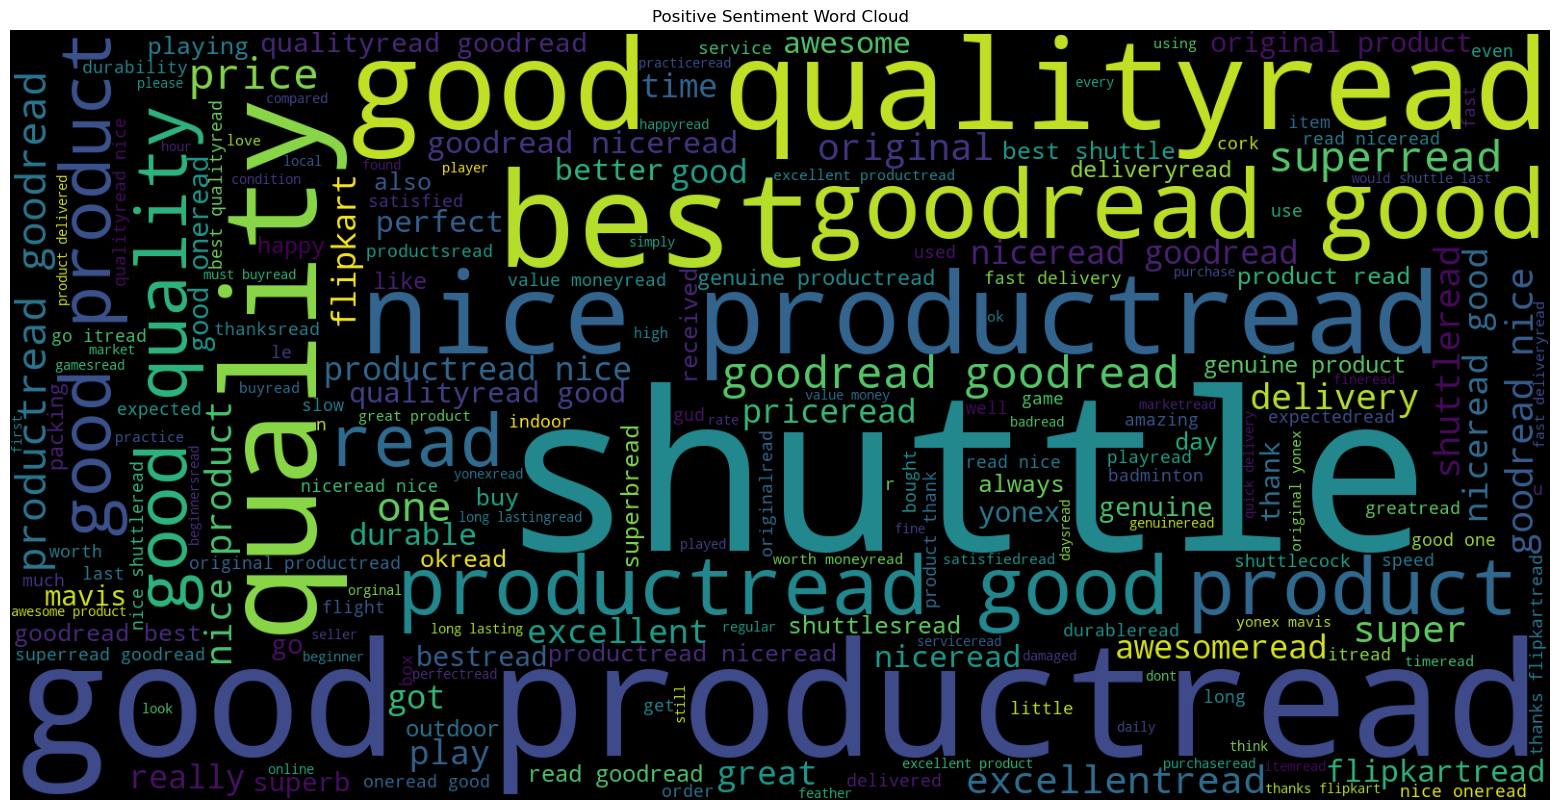

In [73]:
from wordcloud import WordCloud
# Filter dataset into positive sentiment group
positive_reviews = new_dataset[new_dataset['Sentiment'] == 'positive']['clean_review_text']
# Joining all words for positive  reviews
positive_words = ' '.join(positive_reviews)
# Generate word clouds for positive sentiments
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(positive_words)
# Plotting the word clouds
plt.figure(figsize=(20, 10))
plt.imshow(positive_wordcloud)
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

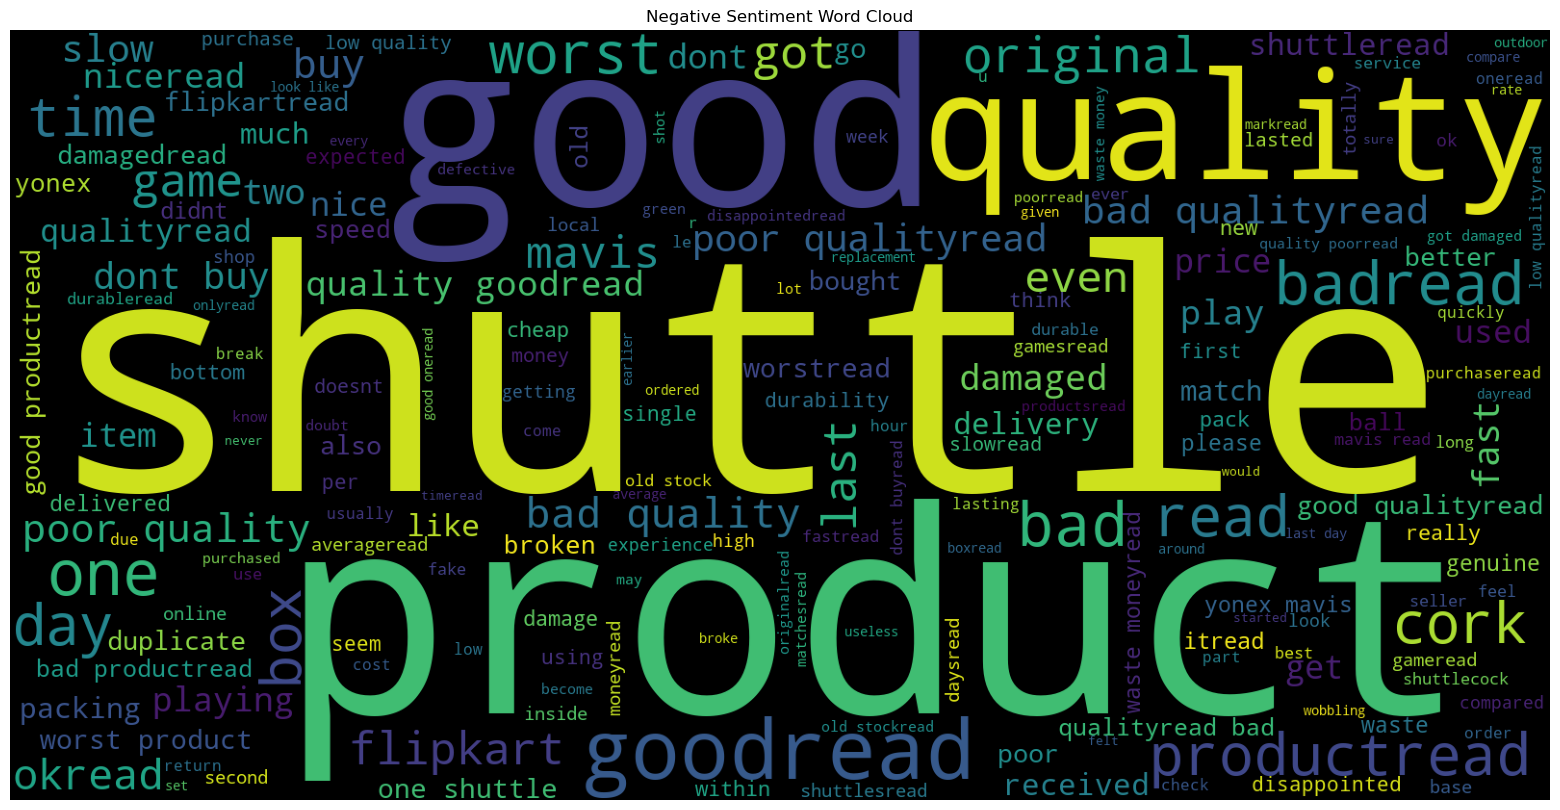

In [74]:
# Filter dataset into negative sentiment group
negative_reviews = new_dataset[new_dataset['Sentiment'] == 'negative']['clean_review_text']
# Joining all words for positive and negative reviews
negative_words = ' '.join(negative_reviews)
# Generate word clouds  negative sentiments
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(negative_words)

#Plotting the word clouds
plt.figure(figsize=(20, 10))
plt.imshow(negative_wordcloud)
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


In [75]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import joblib


In [76]:
x = new_dataset['clean_review_text']  # Use single square brackets or directly access the column
y = new_dataset['Labels']

# spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:


# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = joblib.Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'svm': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    'sgd_classifier': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SGDClassifier())
    ], memory=memory),
    'xgboost': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', XGBClassifier())
    ], memory=memory),
    'k_neighbors': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'svm': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1.0, 10.0],
            'classifier__kernel': ['linear', 'rbf', 'poly']
        }
    ],
    'sgd_classifier': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__penalty': ['l2', 'l1', 'elasticnet']
        }
    ],
    'xgboost': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 4, 5],
            'classifier__learning_rate': [0.1, 0.01, 0.05]
        }
    ],
    'k_neighbors': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_neighbors': [i for i in range(1, 10)],
            'classifier__p': [1, 2, 3]
        }
    ]
   
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=3,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(x_train, y_train)

    best_models[algo] = grid_search.best_estimator_ 
    print('Score on Train Data: ', grid_search.score(x_train,y_train))

    print('Score on Test Data: ', grid_search.score(x_test, y_test))


********** naive_bayes **********
Fitting 3 folds for each of 16 candidates, totalling 48 fits
CPU times: total: 1.12 s
Wall time: 2.2 s
Score on Train Data:  0.9413637569647121
Score on Test Data:  0.9286209286209286
********** decision_tree **********
Fitting 3 folds for each of 24 candidates, totalling 72 fits
CPU times: total: 7.89 s
Wall time: 8.09 s
Score on Train Data:  0.9217512403168249
Score on Test Data:  0.9207003089598351
********** logistic_regression **********
Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: total: 1min 47s
Wall time: 1min 51s
Score on Train Data:  0.9377493273958624
Score on Test Data:  0.9200144770177343
********** svm **********
Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: total: 2min 36s
Wall time: 2min 43s
Score on Train Data:  0.9599430300872351
Score on Test Data:  0.9290633608815426
********** sgd_classifier **********
Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: tot

In [78]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

svm
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1500)),
                ('classifier', SVC())])

sgd_classifier
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(ma

In [79]:
 

print("Best parameters set found on train set:")
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print()


Best parameters set found on train set:
{'classifier__n_neighbors': 7, 'classifier__p': 2, 'vectorization': CountVectorizer(max_features=1000), 'vectorization__max_features': 1000}
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])



In [81]:
import os
from sklearn import metrics 
import joblib

# Make sure 'best_models/' directory exists
os.makedirs('best_models/', exist_ok=True)

for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    # Dump the model
    joblib.dump(model, f'best_models/{name}.pkl')
    
    # Load the model
    model = joblib.load(f'best_models/{name}.pkl')
    
    # Predict and evaluate
    %time y_test_pred = model.predict(x_test)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    # Check model size
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")


********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 23.6 ms
Test Score (F1) 0.9286209286209286
Model Size: 181447 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 7.07 ms
Test Score (F1) 0.9207003089598351
Model Size: 91652 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 0 ns
Test Score (F1) 0.9200144770177343
Model Size: 106965 Bytes
********** svm **********
CPU times: total: 156 ms
Wall time: 156 ms
Test Score (F1) 0.9290633608815426
Model Size: 342212 Bytes
********** sgd_classifier **********
CPU times: total: 0 ns
Wall time: 5.03 ms
Test Score (F1) 0.9255797853928697
Model Size: 126187 Bytes
********** xgboost **********
CPU times: total: 109 ms
Wall time: 16.5 ms
Test Score (F1) 0.9277149708804384
Model Size: 331460 Bytes
********** k_neighbors **********
CPU times: total: 625 ms
Wall time: 250 ms
Test Score (F1) 0.9111111111111112
Model Size: 359893 Bytes
